In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=300
pd.options.display.max_rows=50

In [2]:
df=pd.read_csv('train.csv')

In [3]:
data=df.copy()

In [4]:
data.shape

(10000, 20)

In [9]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [35]:
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [36]:
data.loc[data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [42]:
data.loc[(data['Square'] < 22) | (data['Square'] > 160)].count()

Id               48
DistrictId       48
Rooms            48
Square           48
LifeSquare       40
KitchenSquare    48
Floor            48
HouseFloor       48
HouseYear        48
Ecology_1        48
Ecology_2        48
Ecology_3        48
Social_1         48
Social_2         48
Social_3         48
Healthcare_1     23
Helthcare_2      48
Shops_1          48
Shops_2          48
Price            48
dtype: int64

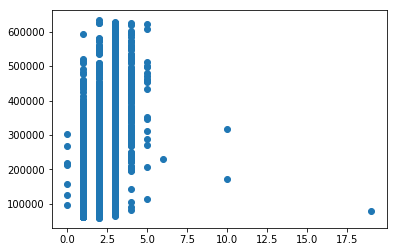

In [11]:
plt.scatter(data['Rooms'],data['Price'])

In [12]:
#index_rooms=data.loc[data['Rooms']>8].index
#data.drop(index_rooms,axis=0,inplace=True)

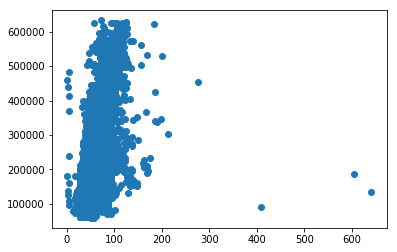

In [13]:
plt.scatter(data['Square'],data['Price'])

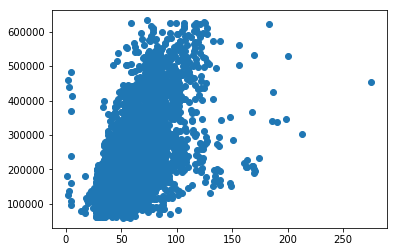

In [14]:
plt.scatter(data.loc[data['Square']<300,'Square'],
            data.loc[data['Square']<300,'Price'])

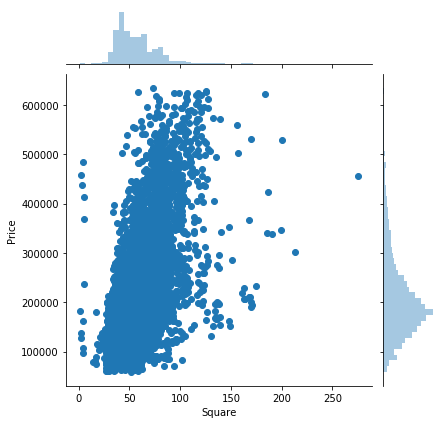

In [15]:
sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Price'])

In [18]:
? sns.jointplot

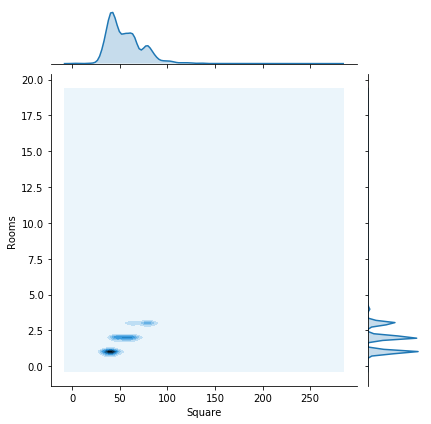

In [29]:
sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Rooms'],kind='kde')

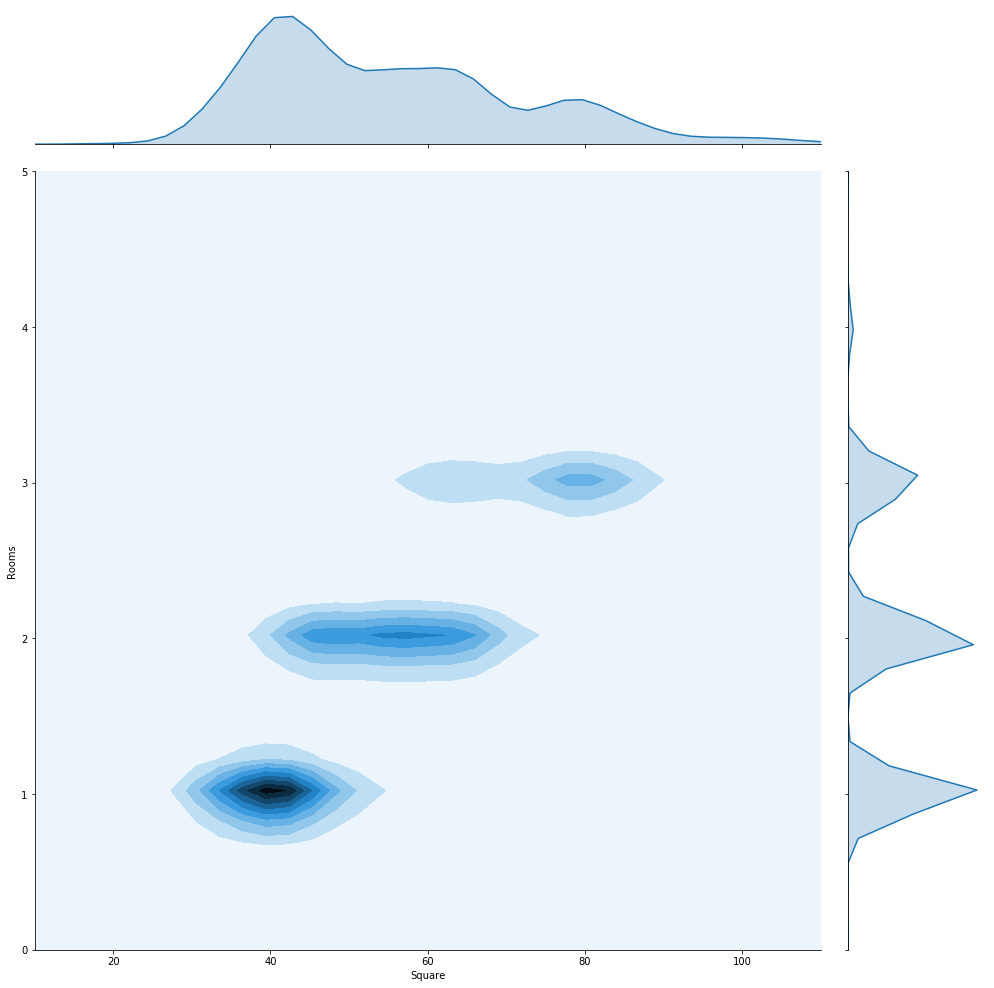

In [31]:
g = sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Rooms'],kind='kde', xlim = {10,110}, ylim = {0, 5})
g.fig.set_size_inches(15,15)

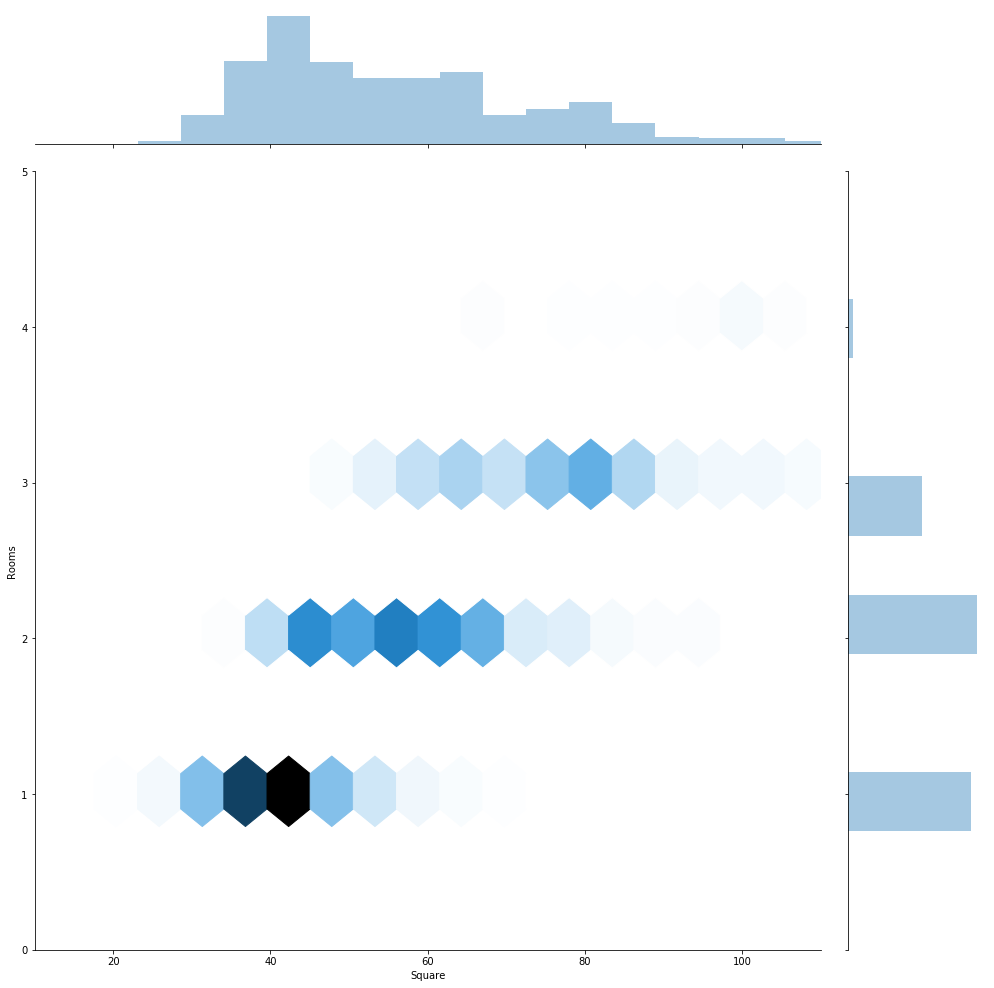

In [32]:
g = sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Rooms'],kind='hex', xlim = {10,110}, ylim = {0, 5})
g.fig.set_size_inches(15,15)

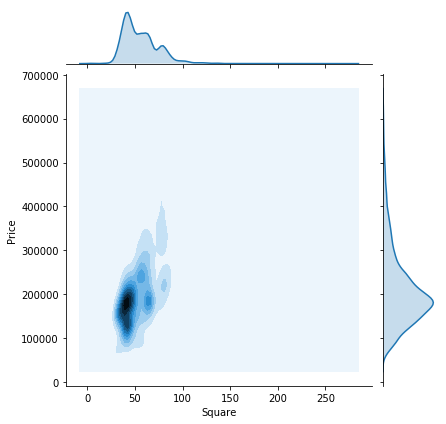

In [17]:
sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Price'],kind='kde')

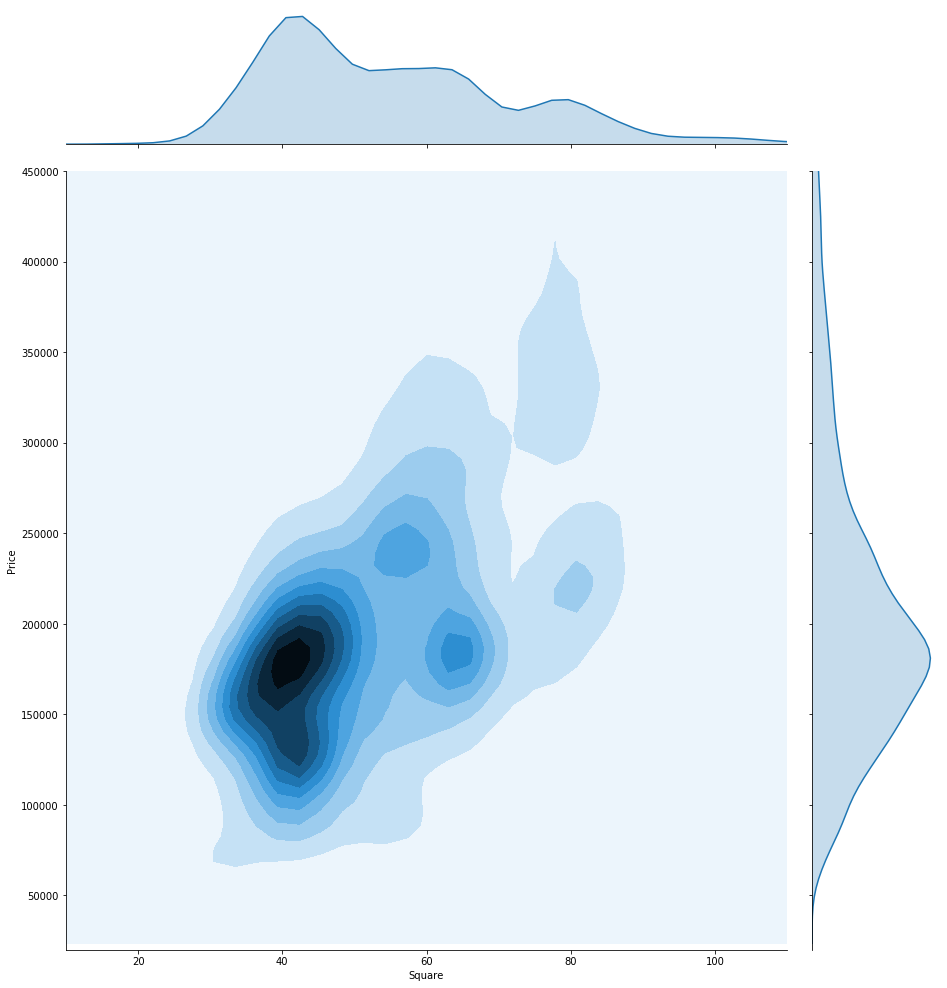

In [26]:
g = sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Price'],kind='kde', xlim = {10,110}, ylim = {20000, 450000})
g.fig.set_size_inches(15,15)

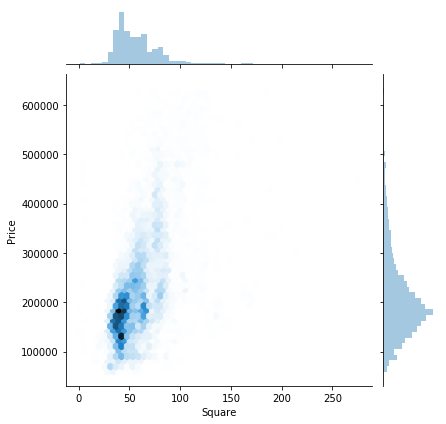

In [19]:
sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Price'],kind='hex')

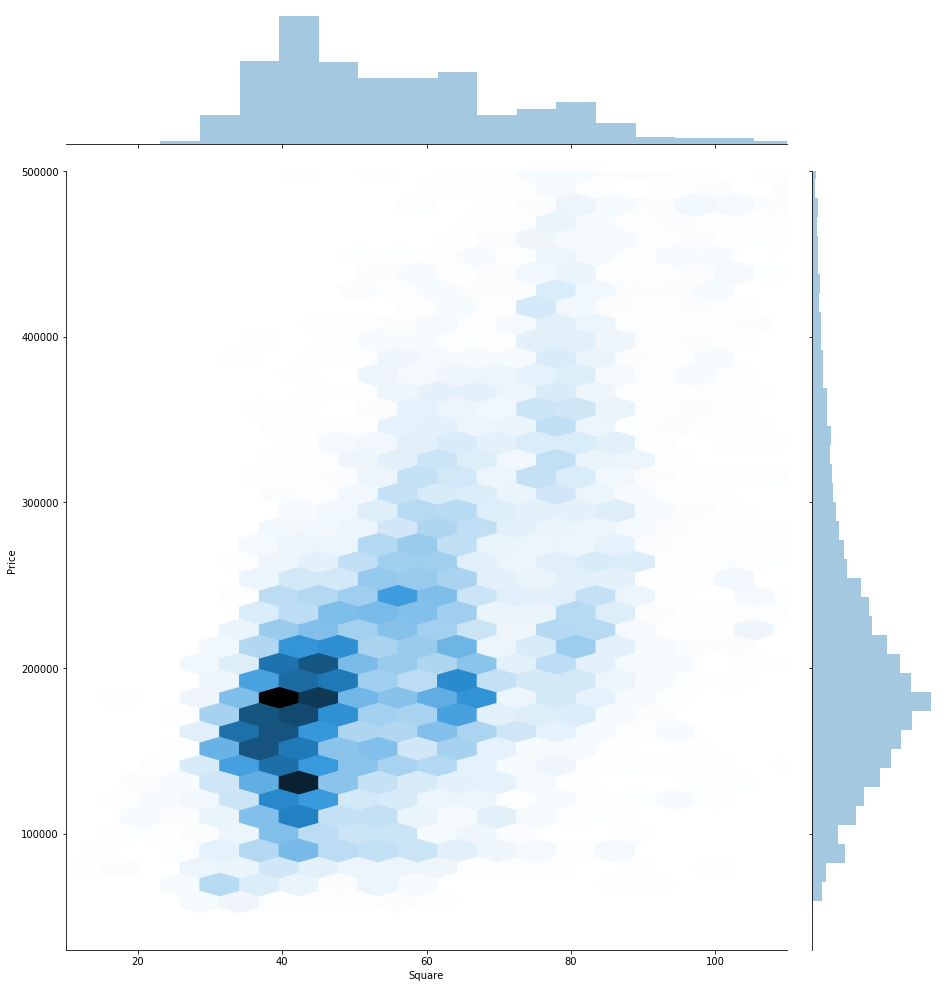

In [25]:
g=sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'Price'],kind='hex', xlim = {10,110}, ylim = {30000, 500000})
g.fig.set_size_inches(15,15)

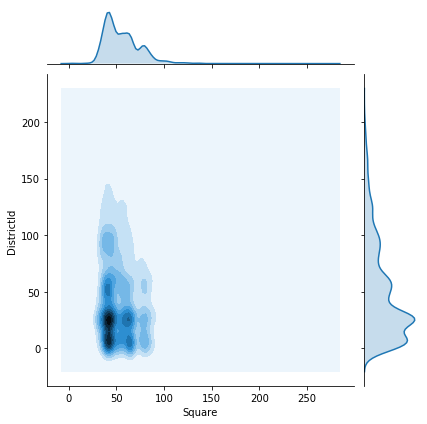

In [33]:
sns.jointplot(data.loc[data['Square']<300,'Square'],
              data.loc[data['Square']<300,'DistrictId'],kind='kde')

In [20]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [33]:
shape_0_rooms=data.loc[data['Rooms']==0,'Price'].values[:].shape[0]

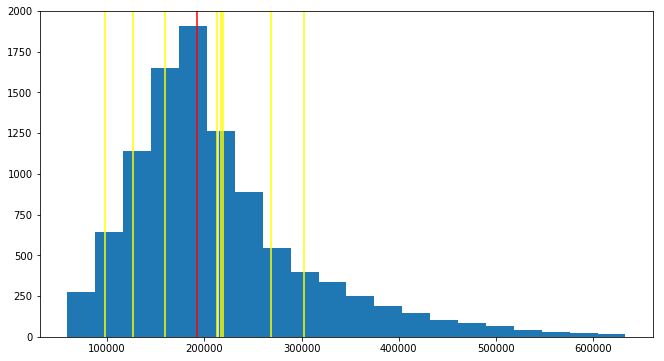

In [35]:
plt.figure(figsize=(11,6))
plt.hist(data['Price'],bins=20)
plt.axvline(x=data['Price'].median(),color='red')
plt.axvline(x=data['Price'].mean(),color='white')
for i in range(shape_0_rooms):
    plt.axvline(x=data.loc[data['Rooms']==0,'Price'].values[i],color='yellow')

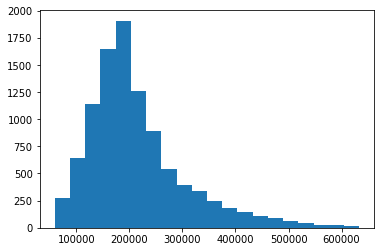

In [37]:
plt.hist(data['Price'],bins=20)

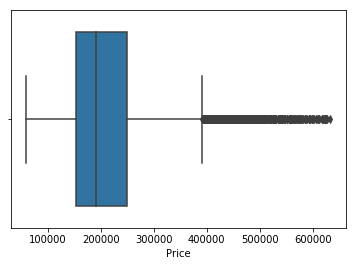

In [38]:
sns.boxplot(data['Price']);

In [39]:
data.Price.describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

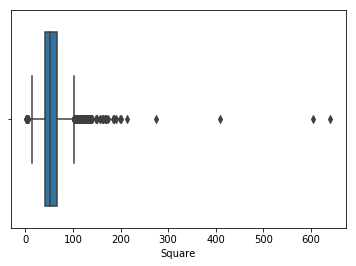

In [40]:
sns.boxplot(data['Square'])

In [41]:
data.Square.describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [43]:
(data.Square.describe()['75%']-data.Square.describe()['25%'])*3+data.Square.describe()['50%']

124.89054320257446

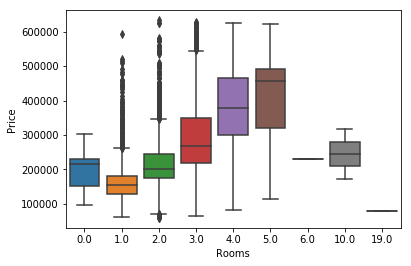

In [44]:
sns.boxplot(x=data['Rooms'],y=data['Price']);

In [45]:
? sns.boxplot

# Дамми переменные

In [46]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [47]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [48]:
data.Ecology_2.unique()

array(['B', 'A'], dtype=object)

In [49]:
data.Ecology_3.unique()

array(['B', 'A'], dtype=object)

In [50]:
data.Shops_2.unique()

array(['B', 'A'], dtype=object)

In [53]:
pd.get_dummies(data)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,35,7715,4,990.0,0,6,215898.447742,0,1,0,1,0,1
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,20,4386,14,NaN,1,5,296021.204377,0,1,0,1,0,1
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,7.577876e-02,6,1437,3,NaN,0,2,221244.156664,0,1,0,1,0,1
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,7.122317e-03,1,264,0,NaN,0,1,229102.795999,0,1,0,1,0,1
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,6,1437,3,NaN,0,2,95380.220993,0,1,0,1,0,1


In [54]:
data.DistrictId.unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

In [55]:
data.DistrictId.nunique()

205

In [56]:
data.loc[data.DistrictId==149,'Price'].mean()

226824.06670235342

In [57]:
data.loc[data.DistrictId==209,'Price'].mean()

140048.80227724573

In [58]:
data['DistrictId']=data['DistrictId'].astype(str)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null object
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(4)
memory usage: 1.5+ MB


In [82]:
print(data.shape)
data.head()

(10000, 21)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,155748.415754


In [77]:
print(pd.get_dummies(data).shape)
df_dummies=pd.get_dummies(data)

(10000, 228)


In [81]:
df_dummies.head()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,mean_price,DistrictId_0,DistrictId_1,DistrictId_10,DistrictId_100,DistrictId_101,DistrictId_102,DistrictId_103,DistrictId_104,DistrictId_105,DistrictId_106,DistrictId_107,DistrictId_108,DistrictId_109,DistrictId_11,DistrictId_110,DistrictId_111,DistrictId_112,DistrictId_113,DistrictId_114,DistrictId_115,DistrictId_116,DistrictId_117,DistrictId_118,DistrictId_119,DistrictId_12,DistrictId_120,DistrictId_121,DistrictId_122,DistrictId_123,DistrictId_124,DistrictId_125,DistrictId_126,DistrictId_127,DistrictId_128,DistrictId_129,DistrictId_13,DistrictId_130,DistrictId_131,DistrictId_132,DistrictId_133,DistrictId_134,DistrictId_135,DistrictId_136,DistrictId_137,DistrictId_138,DistrictId_139,DistrictId_14,DistrictId_140,DistrictId_141,DistrictId_142,DistrictId_143,DistrictId_144,DistrictId_145,DistrictId_146,DistrictId_147,DistrictId_148,DistrictId_149,DistrictId_15,DistrictId_150,DistrictId_151,DistrictId_152,DistrictId_153,DistrictId_154,DistrictId_155,DistrictId_156,DistrictId_157,DistrictId_158,DistrictId_159,DistrictId_16,DistrictId_160,DistrictId_161,DistrictId_162,DistrictId_163,DistrictId_164,DistrictId_165,DistrictId_166,DistrictId_167,DistrictId_168,DistrictId_169,DistrictId_17,DistrictId_170,DistrictId_171,DistrictId_172,DistrictId_173,DistrictId_174,DistrictId_175,DistrictId_176,DistrictId_177,DistrictId_178,DistrictId_179,DistrictId_18,DistrictId_180,DistrictId_181,DistrictId_182,DistrictId_183,DistrictId_184,DistrictId_185,DistrictId_186,DistrictId_187,DistrictId_188,DistrictId_189,DistrictId_19,DistrictId_190,DistrictId_191,DistrictId_192,DistrictId_193,DistrictId_194,DistrictId_195,DistrictId_196,DistrictId_199,DistrictId_2,DistrictId_20,DistrictId_200,DistrictId_201,DistrictId_202,DistrictId_205,DistrictId_207,DistrictId_208,DistrictId_209,DistrictId_21,DistrictId_22,DistrictId_23,DistrictId_24,DistrictId_25,DistrictId_26,DistrictId_27,DistrictId_28,DistrictId_29,DistrictId_3,DistrictId_30,DistrictId_31,DistrictId_32,DistrictId_33,DistrictId_34,DistrictId_35,DistrictId_36,DistrictId_37,DistrictId_38,DistrictId_39,DistrictId_4,DistrictId_40,DistrictId_41,DistrictId_42,DistrictId_43,DistrictId_44,DistrictId_45,DistrictId_46,DistrictId_47,DistrictId_48,DistrictId_49,DistrictId_5,DistrictId_50,DistrictId_51,DistrictId_52,DistrictId_53,DistrictId_54,DistrictId_55,DistrictId_56,DistrictId_57,DistrictId_58,DistrictId_59,DistrictId_6,DistrictId_60,DistrictId_61,DistrictId_62,DistrictId_63,DistrictId_64,DistrictId_65,DistrictId_66,DistrictId_67,DistrictId_68,DistrictId_69,DistrictId_7,DistrictId_70,DistrictId_71,DistrictId_72,DistrictId_73,DistrictId_74,DistrictId_75,DistrictId_76,DistrictId_77,DistrictId_78,DistrictId_79,DistrictId_8,DistrictId_80,DistrictId_81,DistrictId_82,DistrictId_83,DistrictId_84,DistrictId_85,DistrictId_86,DistrictId_87,DistrictId_88,DistrictId_89,DistrictId_9,DistrictId_90,DistrictId_91,DistrictId_92,DistrictId_93,DistrictId_94,DistrictId_95,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,213160.076297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,15053,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,303643.563728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
data.DistrictId.value_counts()

27     851
1      652
23     565
6      511
9      294
62     247
30     228
58     179
53     174
21     165
52     143
8      142
11     129
46     119
61     118
45     116
74     114
34     111
57     107
44     104
13      97
101     97
47      97
99      97
7       92
48      90
29      89
94      89
41      87
3       82
84      80
28      79
2       78
22      78
25      77
85      76
93      73
90      72
37      72
96      71
59      67
75      66
26      65
12      64
128     64
88      64
66      62
67      61
17      59
55      58
39      57
10      56
105     55
31      55
18      51
111     49
119     49
0       48
78      46
91      44
63      43
124     43
129     43
42      42
79      42
109     41
113     41
77      40
54      37
38      36
15      36
24      35
5       34
56      34
32      34
103     33
123     32
33      31
19      31
80      31
83      31
69      29
138     29
130     29
64      28
86      27
108     27
70      27
87      27
120     26
100     25

In [65]:
data.groupby('DistrictId')[['Price']].mean()

,Price
DistrictId,
0,195295.590075
1,187805.401737
10,232476.676562
100,268783.768405
101,197604.026660
102,166626.871465
103,268865.145502
104,337688.412275
105,224550.835954


In [71]:
#data.groupby(['DistrictId','Rooms'])[['Price']].mean().reset_index()
data_stat1=data.groupby(['DistrictId','Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})

In [72]:
data=data.merge(data_stat1,on=['DistrictId','Rooms'],how='left')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null object
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
mean_price       10000 non-null float64
dtypes: float64(9), int64(8), object(4)
memory usage: 1.7+ MB


In [74]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,155748.415754


In [75]:
data.loc[:,['Price','mean_price']].corr()

,Price,mean_price
Price,1.000000,0.803103
mean_price,0.803103,1.000000
